# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = 400105069
full_name = 'Mohammad Shayan Shabani'
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [3]:
#TODO
data = pd.read_csv('nutrition.csv')
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [4]:
#TODO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [16]:
#TODO
numeric_df = data.select_dtypes(include=[float, int])
numeric_df.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

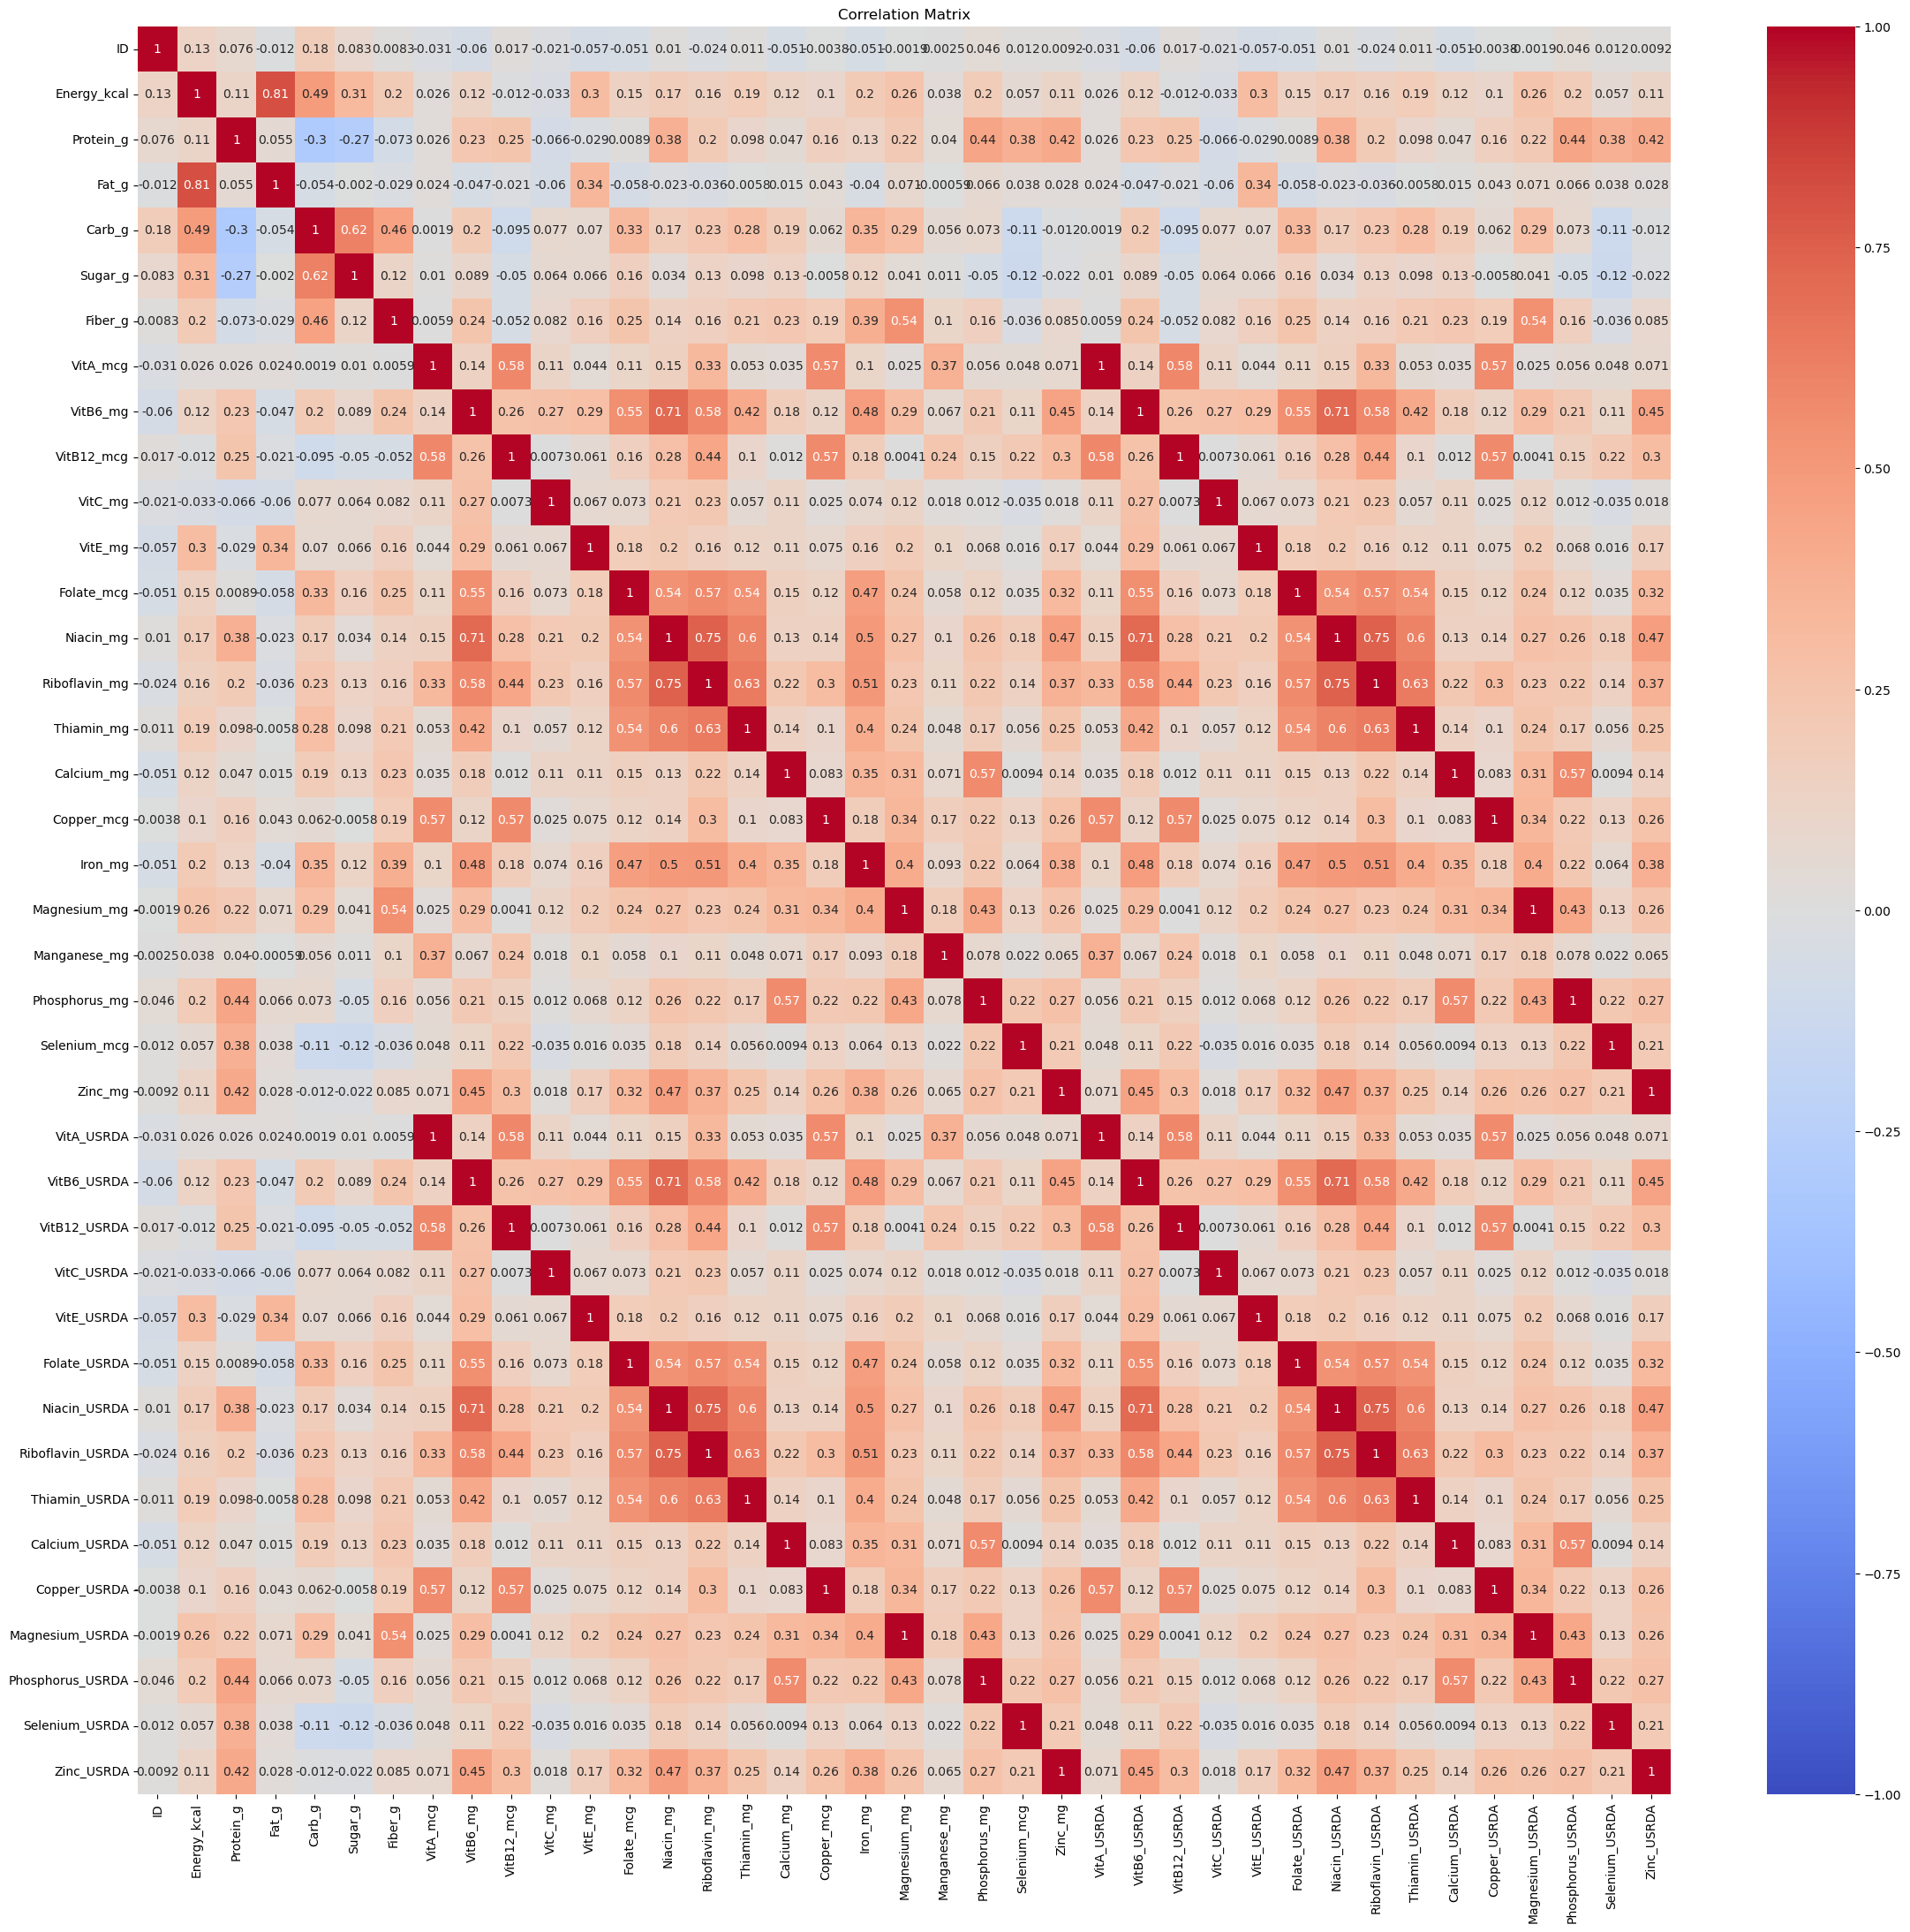

In [18]:
#TODO
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(28, 26))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

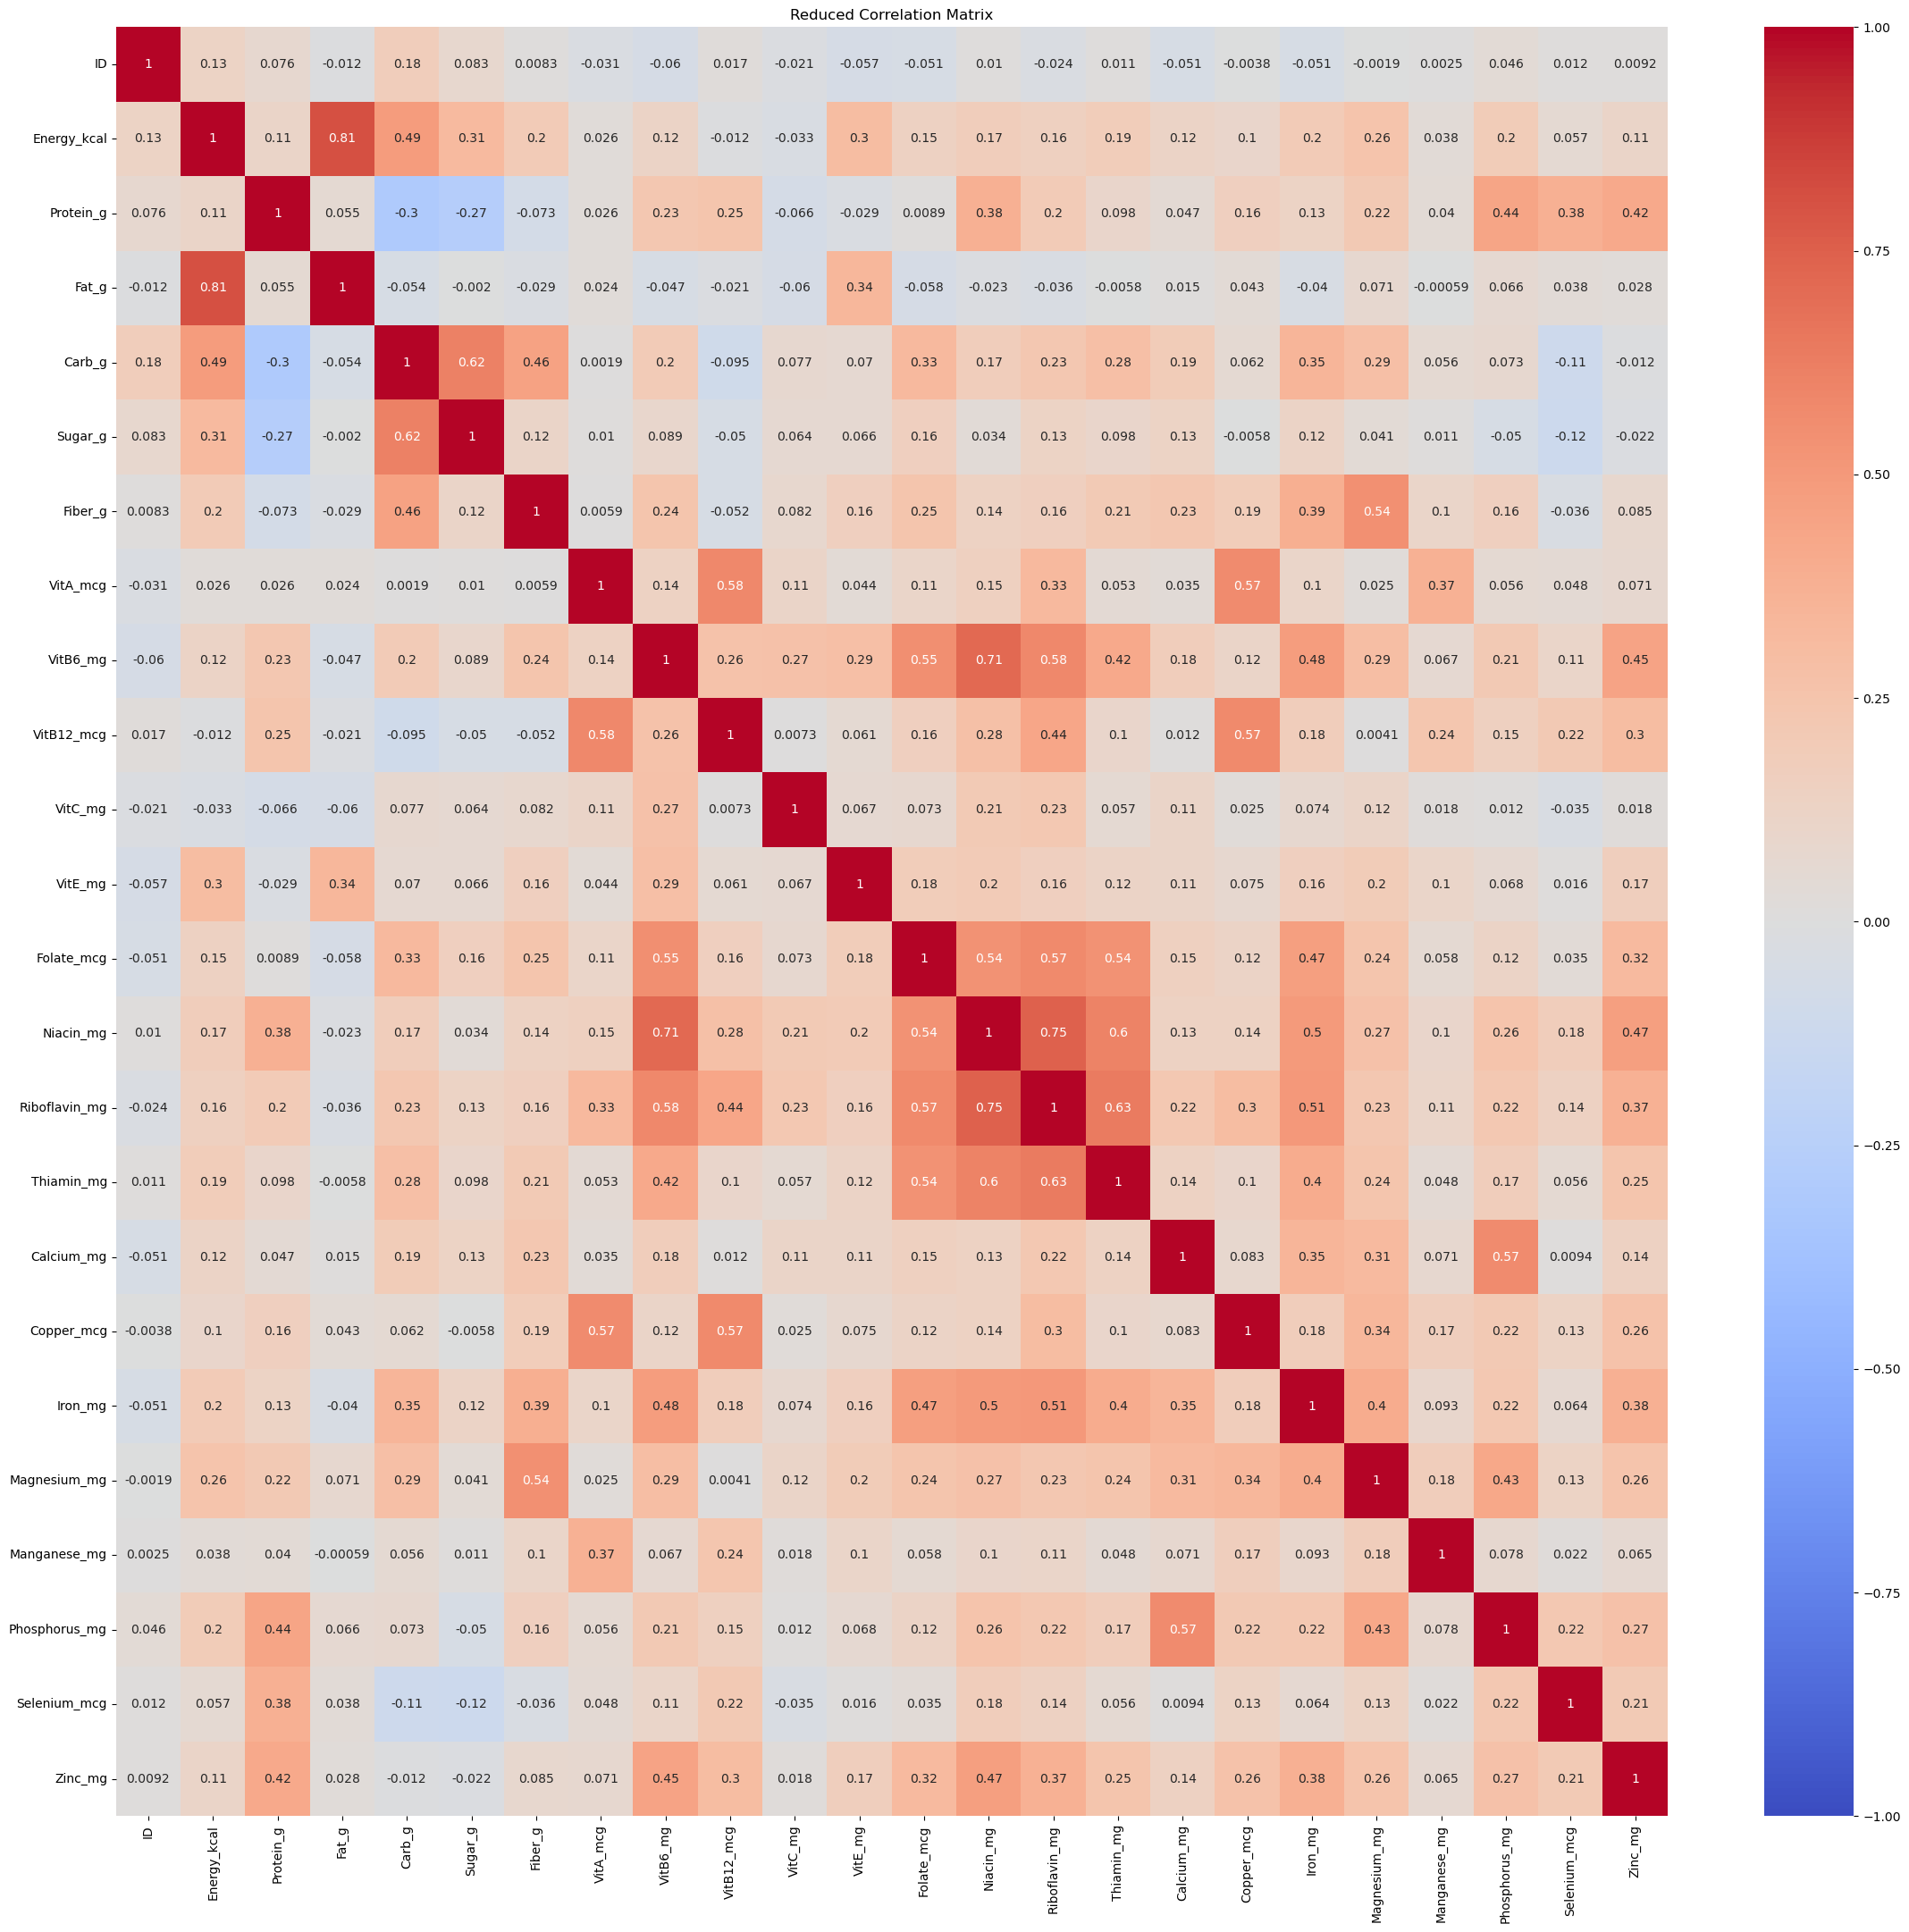

In [19]:
#TODO
def identify_redundant_features(corr_matrix, threshold=0.9):
    redundant_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                redundant_features.add(corr_matrix.columns[i])
    return list(redundant_features)

redundant_features = identify_redundant_features(correlation_matrix)

reduced_df = numeric_df.drop(columns=redundant_features)

reduced_corr_matrix = reduced_df.corr()

plt.figure(figsize=(28, 26))
sns.heatmap(reduced_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Reduced Correlation Matrix')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

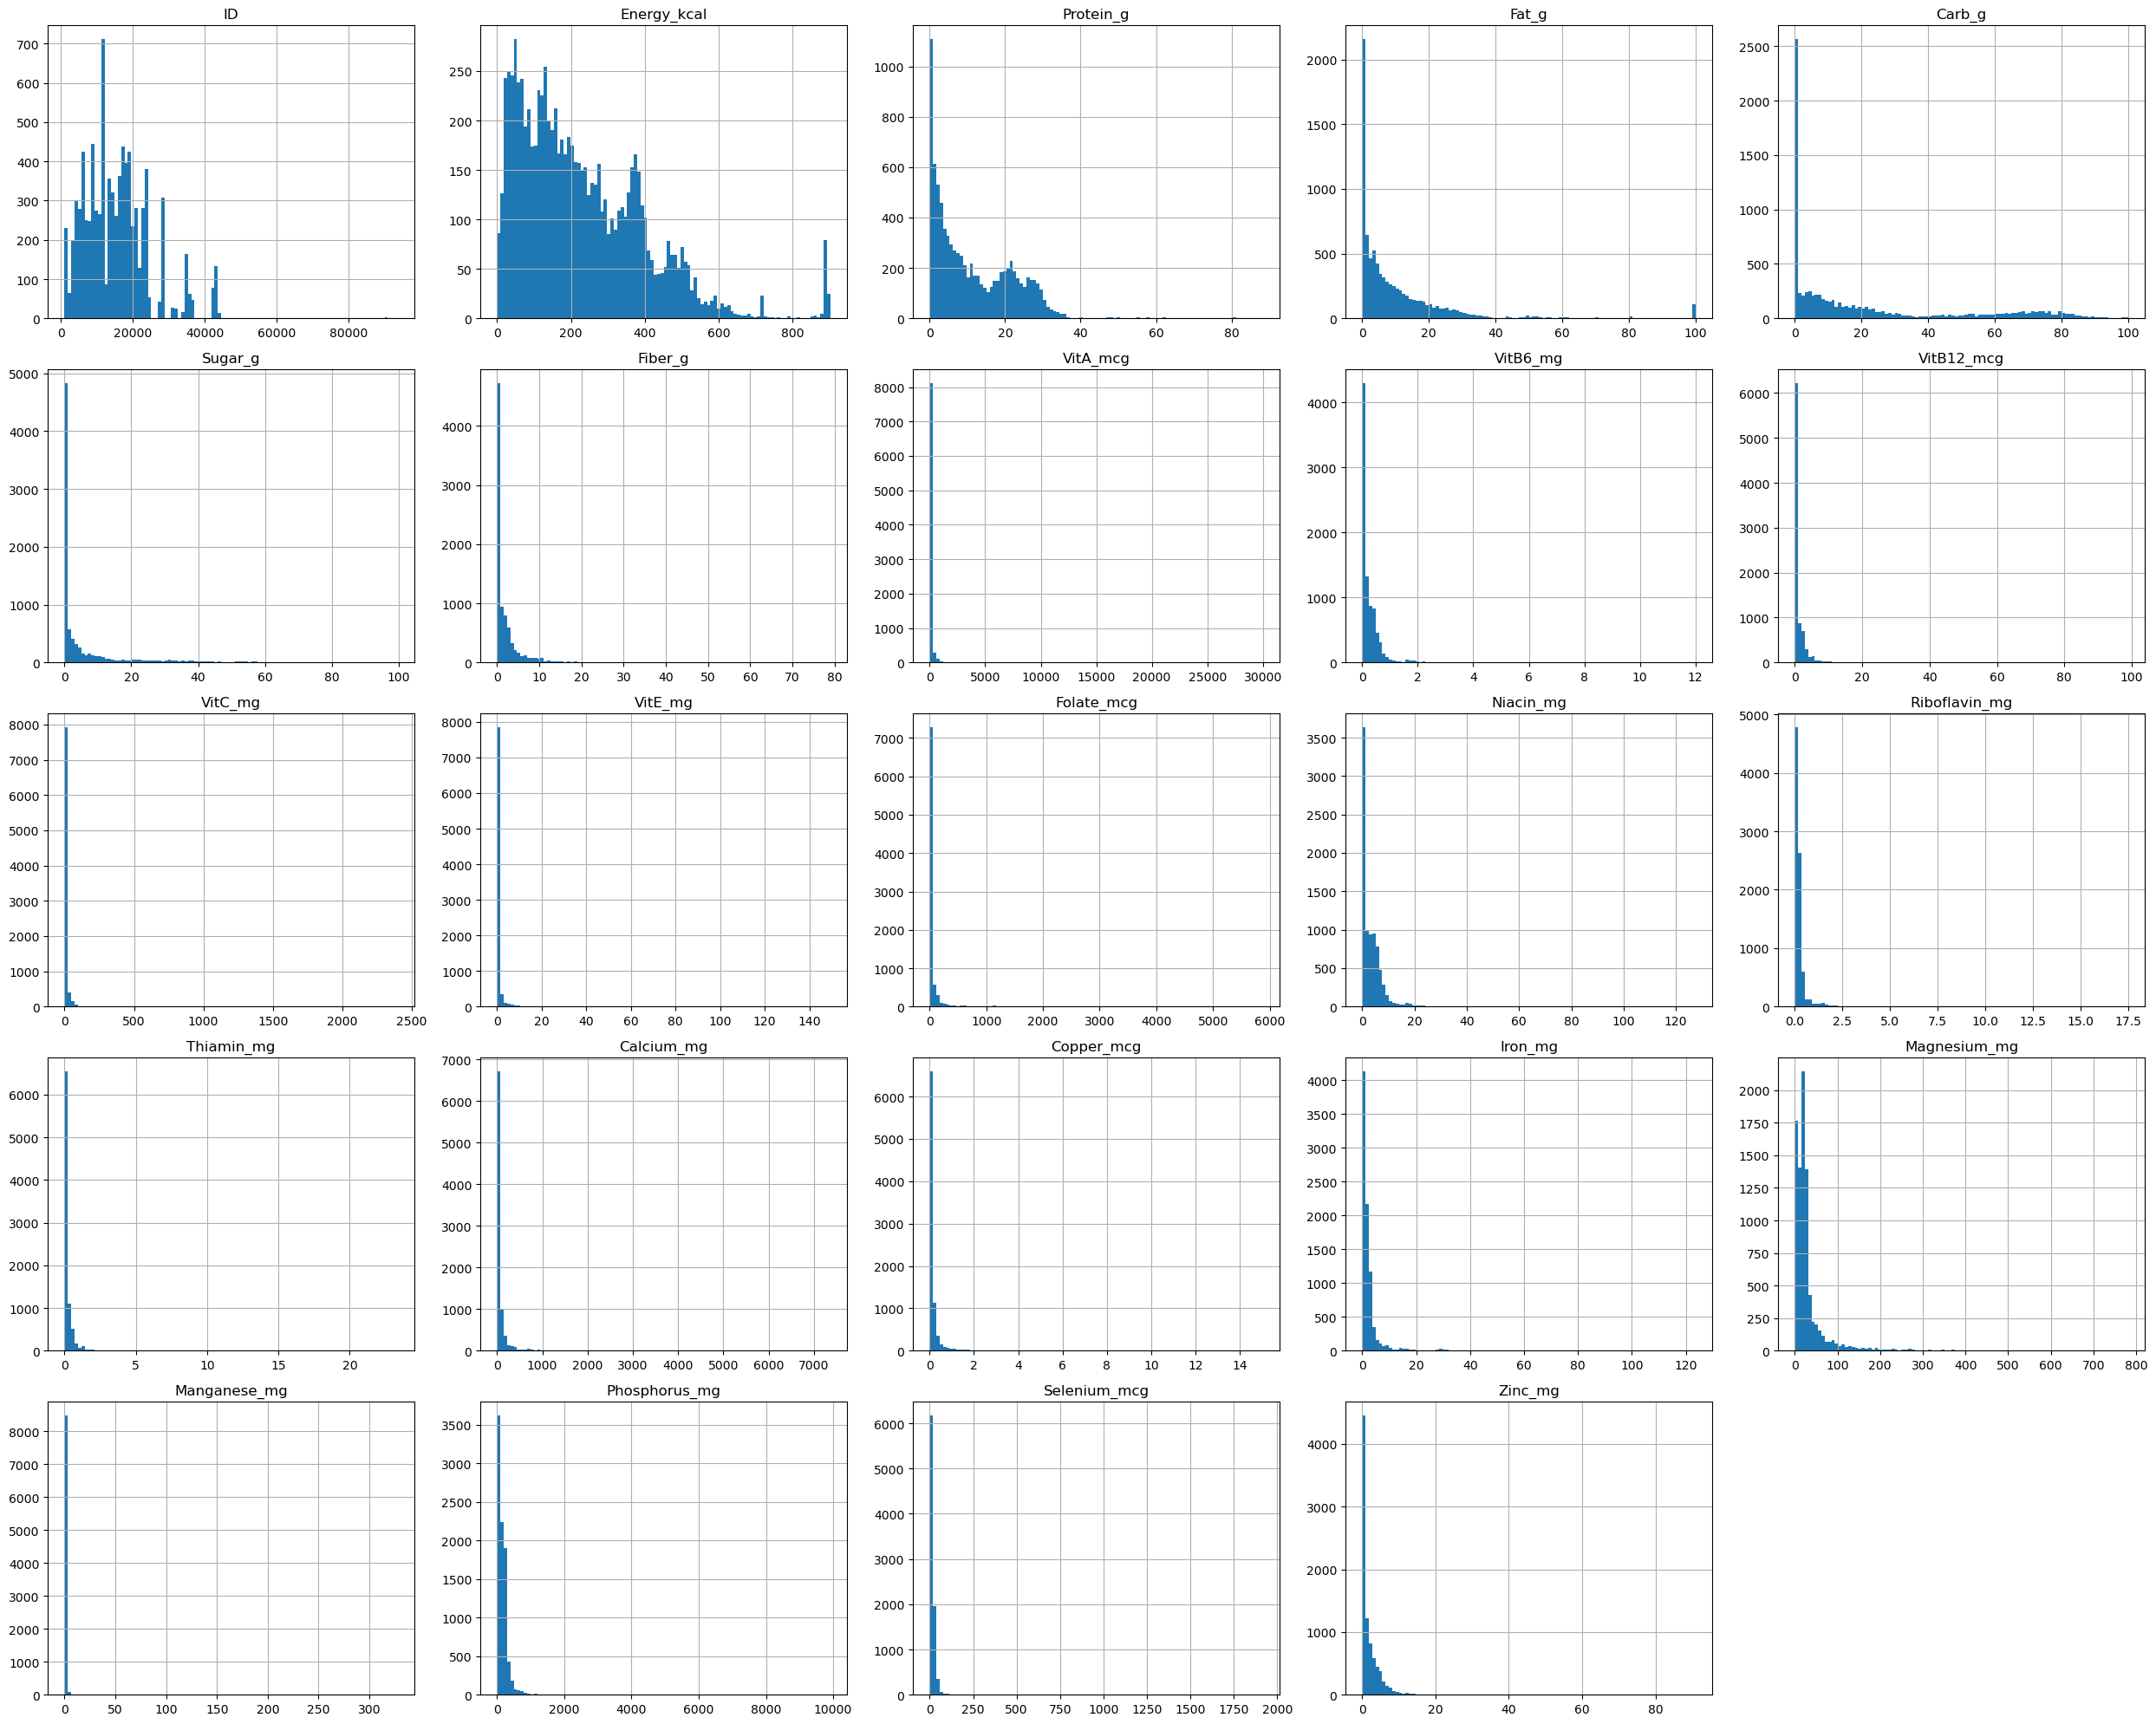

In [20]:
#TODO
reduced_df.hist(bins=100, figsize=(25, 20))
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [21]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df = reduced_df
df = df + 1
df_boxcoxed = pd.DataFrame(index=df.index)

for i in df.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

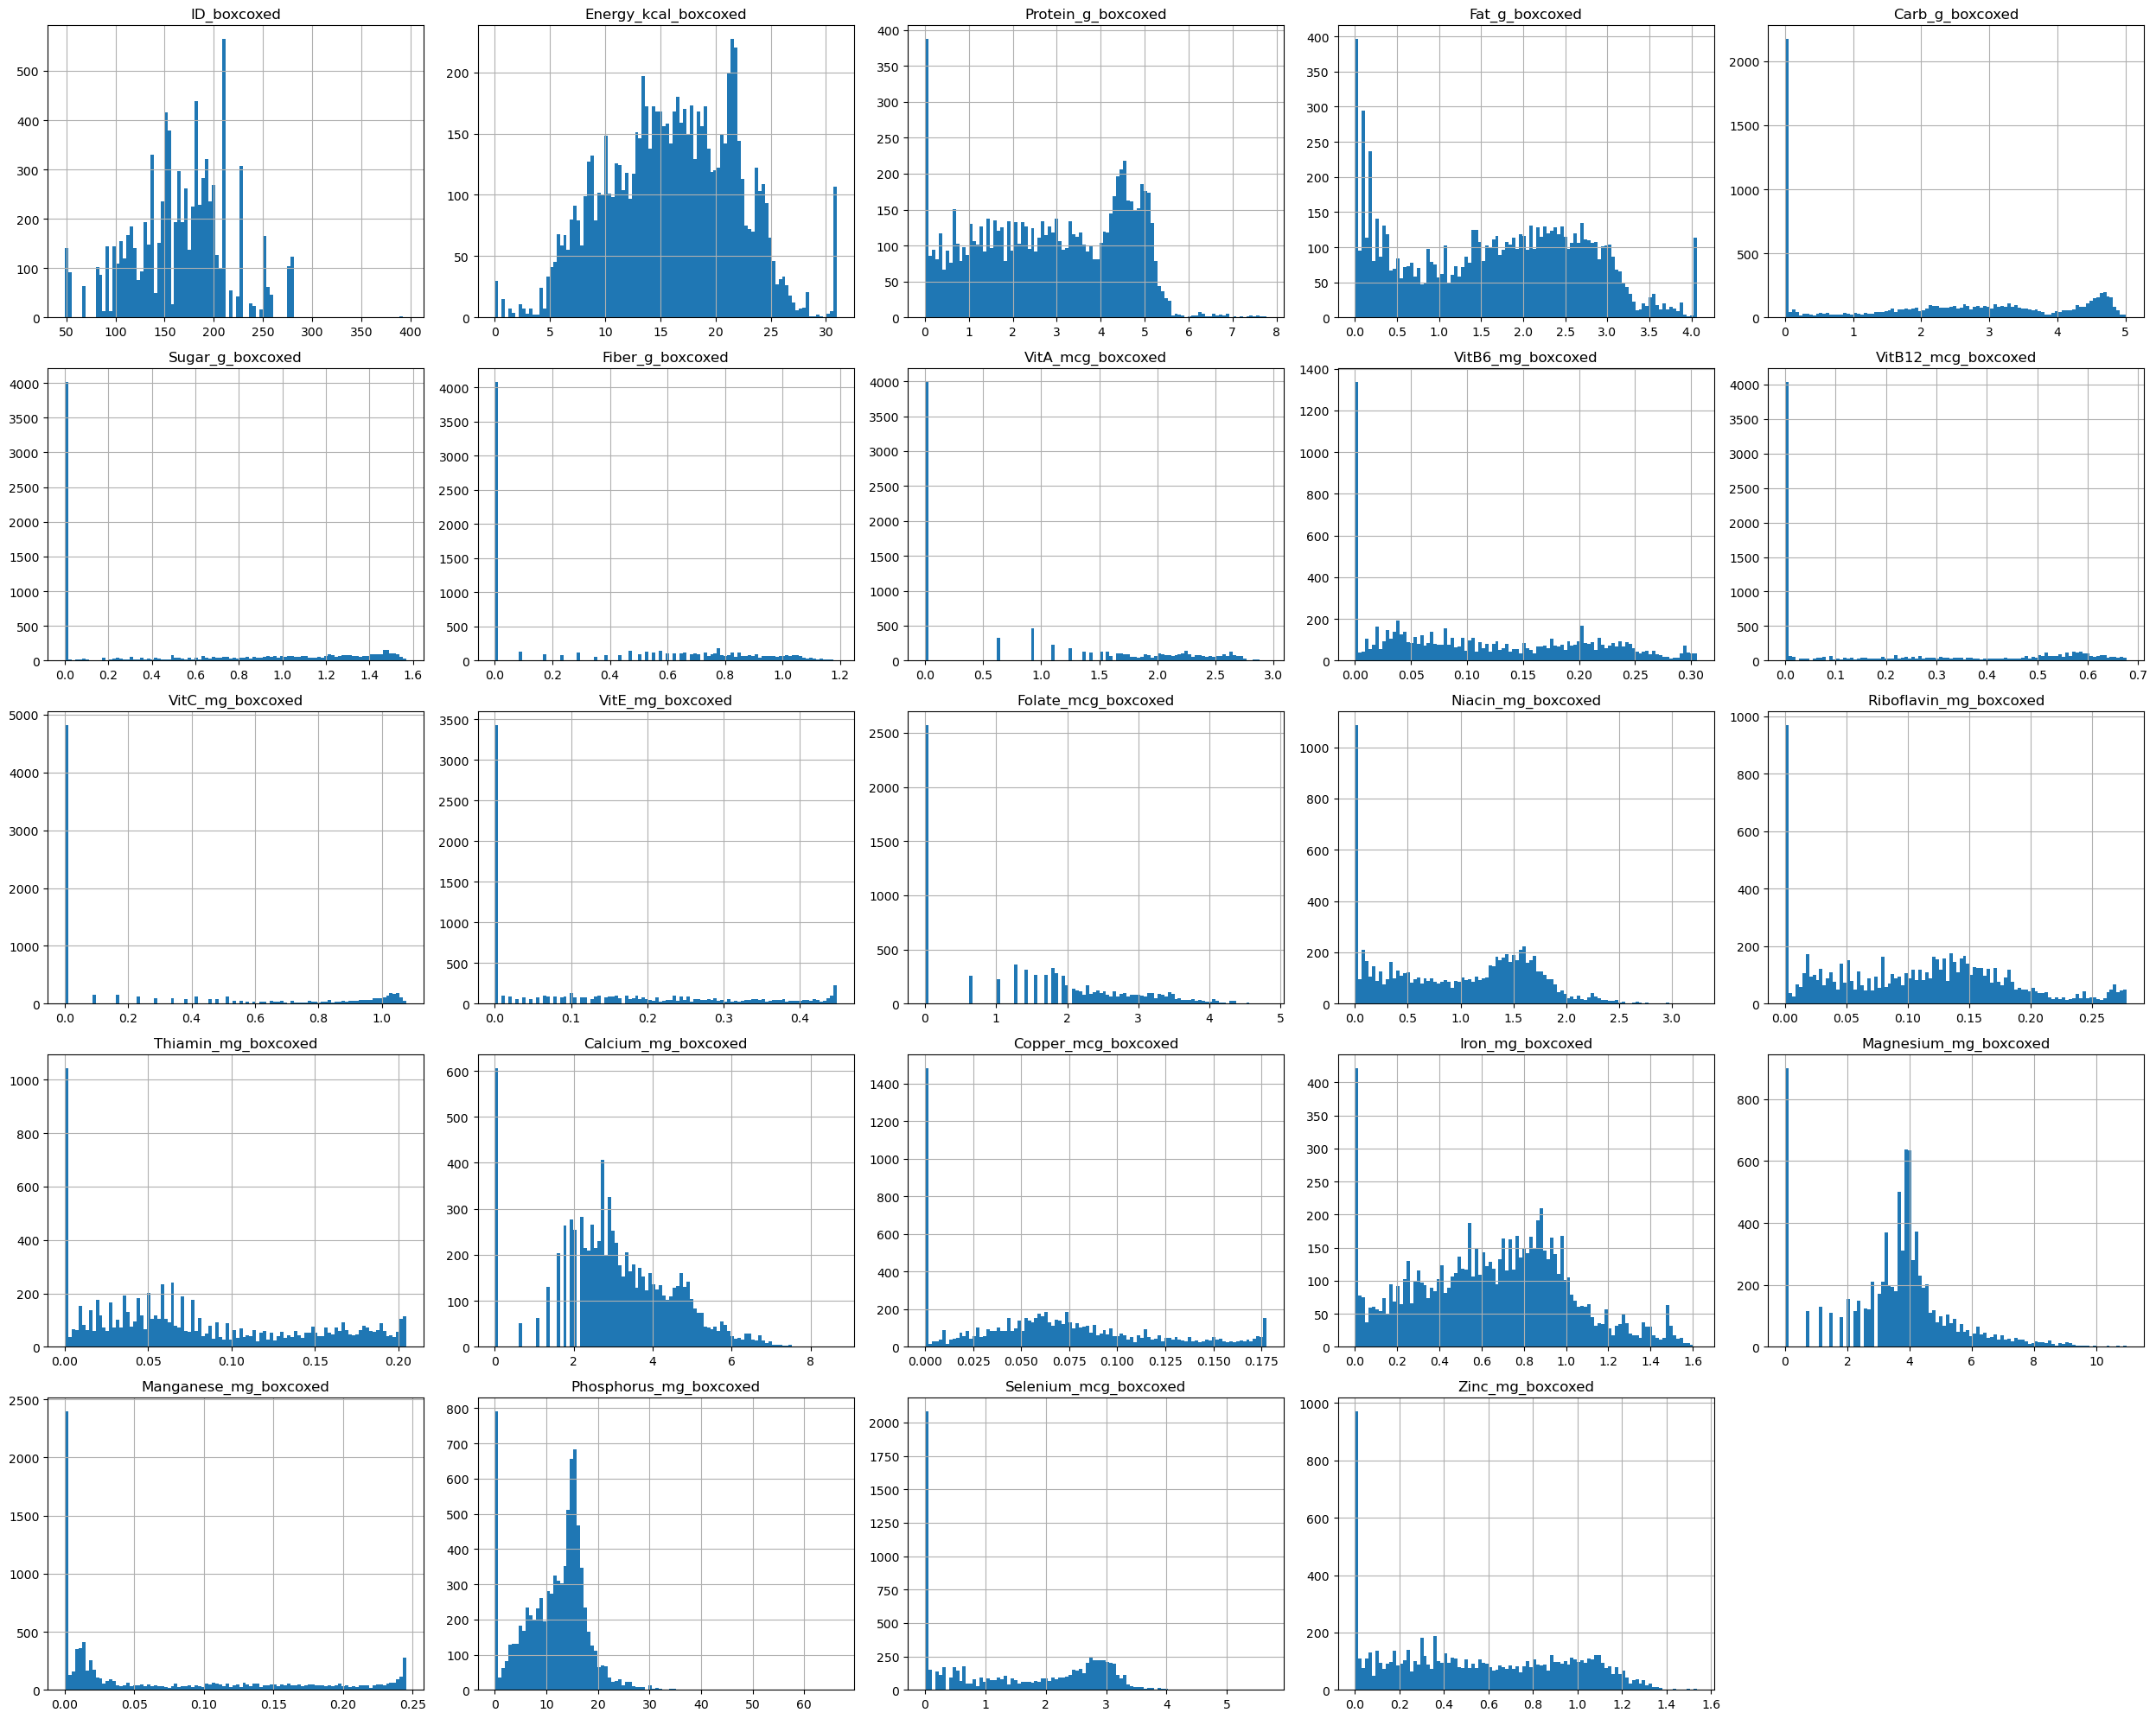

In [44]:
#TODO
df_boxcoxed.hist(bins=100, figsize=(25, 20))
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [45]:
#TODO
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_boxcoxed)
standardized_df = pd.DataFrame(standardized_data, columns=df_boxcoxed.columns)

# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [46]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        #TODO
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]
        
        self.components = eigenvectors[:, :self.n_components]
        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        
        self.explained_variance_ratio_ = explained_variance / total_variance
        
    def transform(self, X):
        #TODO
        # return the pca result
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        #TODO
        #return explained variance of shape (n_components, )
        return self.explained_variance_ratio_
        
    def get_components(self):
        #TODO
        #return pca components (eigenvectors)
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [47]:
#TODO
pca = CustomPCA(n_components=standardized_df.shape[1])
pca.fit(standardized_df.values)
pca_results = pca.transform(standardized_df.values)

explained_variance_ratio = pca.get_explained_variance_ratio()
print("Explained variance ratio:", explained_variance_ratio)
print("Mean: ", pca.mean)
print("Results: ", pca_results)


Explained variance ratio: [0.33157541 0.1722246  0.09278908 0.06127636 0.05290929 0.03723275
 0.03541573 0.02826103 0.02432412 0.02186755 0.01839317 0.01715341
 0.01649721 0.01377746 0.01260837 0.01030045 0.009157   0.00851966
 0.00839129 0.00721043 0.00631794 0.00563896 0.00521336 0.00294537]
Mean:  [ 1.71493257e-16  1.60774929e-17 -7.42038132e-18  7.42038132e-17
 -1.12130207e-16 -1.07183286e-16 -1.31917890e-16  1.15428154e-16
  5.19426692e-17 -6.84324055e-17 -2.96815253e-17 -1.97876835e-17
  1.53354547e-16 -9.39914967e-17  6.59589451e-17 -1.18726101e-16
  4.28733143e-17  1.80974856e-16  1.50056600e-16 -2.09419651e-16
  2.44048097e-16  1.22848535e-16 -4.28733143e-17 -8.24486813e-17]
Results:  [[ 2.73105533 -1.71228799  0.29144373 ... -0.1557479  -0.06783213
   0.8326109 ]
 [ 2.6304547  -1.56022909  0.29548557 ... -0.30231523 -0.04753991
   0.82652339]
 [ 3.84109684 -2.08897365  1.06572288 ...  0.12832486 -0.07571595
   0.92510691]
 ...
 [ 3.10317903  0.71175094  3.1691494  ... -0.4141

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


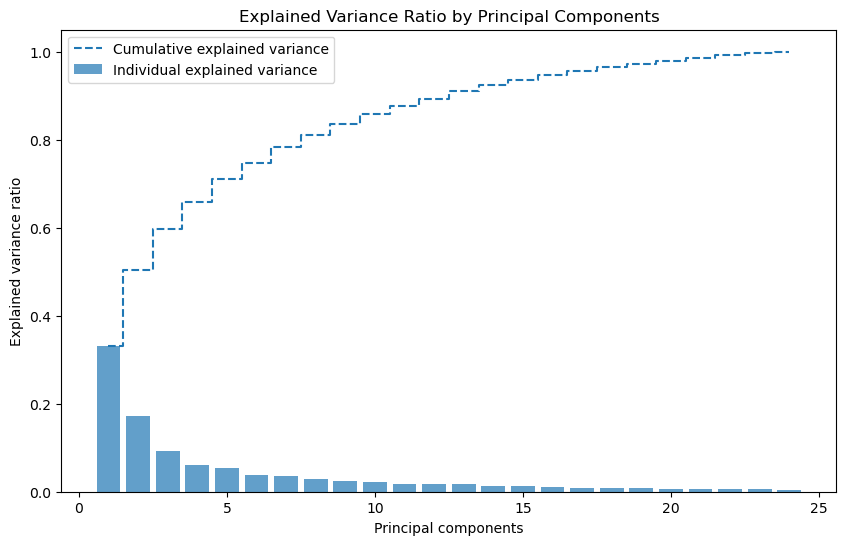

In [48]:
#TODO
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', linestyle='--', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

therefore we are going to pick 5 components

In [49]:
#TODO
#print the total explained variance ration for the first 5 components
n_components = 5
total_explained_variance_ratio = np.sum(explained_variance_ratio[:n_components])
print("Total explained variance ratio for the first 5 components:", total_explained_variance_ratio)

Total explained variance ratio for the first 5 components: 0.7107747332283336


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [50]:
#TODO
pca_df = pd.DataFrame(pca_results[:, :n_components], columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['FoodGroup'] = data['FoodGroup']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,FoodGroup
0,2.731055,-1.712288,0.291444,4.383741,2.439481,Dairy and Egg Products
1,2.630455,-1.560229,0.295486,4.262381,2.515735,Dairy and Egg Products
2,3.841097,-2.088974,1.065723,4.391250,2.476382,Dairy and Egg Products
3,-1.901918,-1.373949,-1.293599,2.951373,0.893822,Dairy and Egg Products
4,-1.484754,-1.333337,-1.143363,3.116678,1.295158,Dairy and Egg Products


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

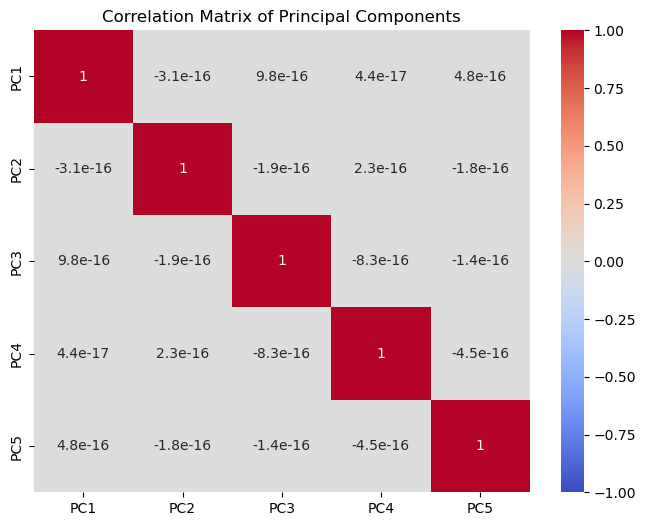

In [51]:
#TODO
plt.figure(figsize=(8, 6))
sns.heatmap(pca_df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Principal Components')
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [61]:
# TODO get eigenvectors
components = pca.get_components()

components_df = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(components.shape[1])], index=standardized_df.columns)
components_df = components_df * -1
sorted_pc1 = components_df['PC1'].sort_values(ascending=False)
sorted_pc2 = components_df['PC2'].sort_values(ascending=False)


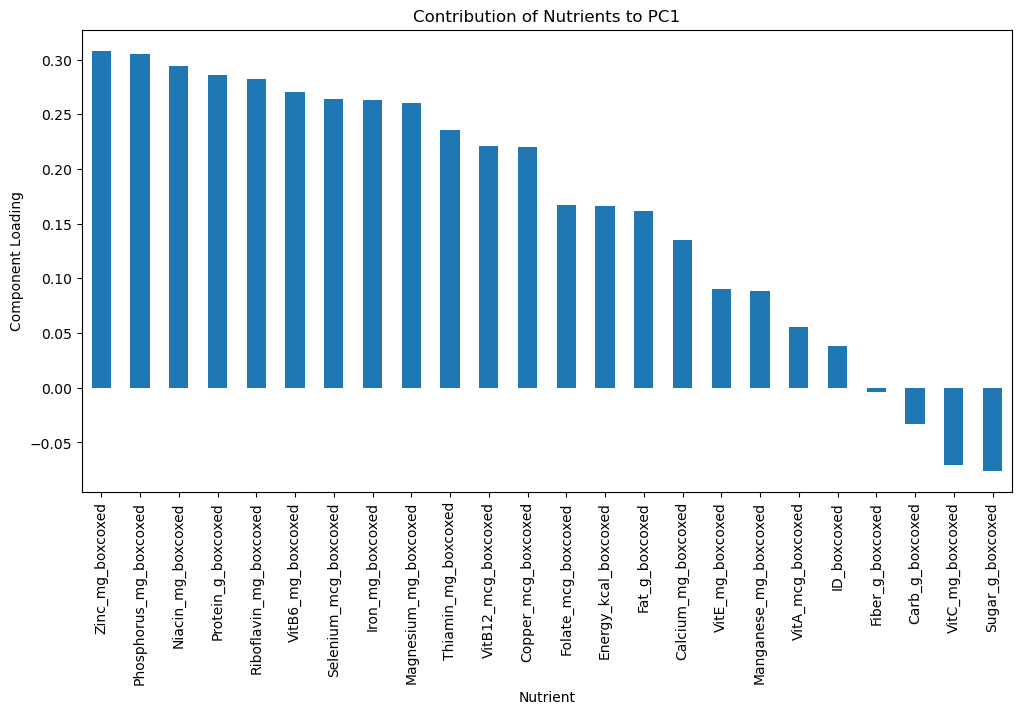

In [62]:
#TODO

plt.figure(figsize=(12, 6))
sorted_pc1.plot(kind='bar')
plt.title('Contribution of Nutrients to PC1')
plt.ylabel('Component Loading')
plt.xlabel('Nutrient')
plt.show()


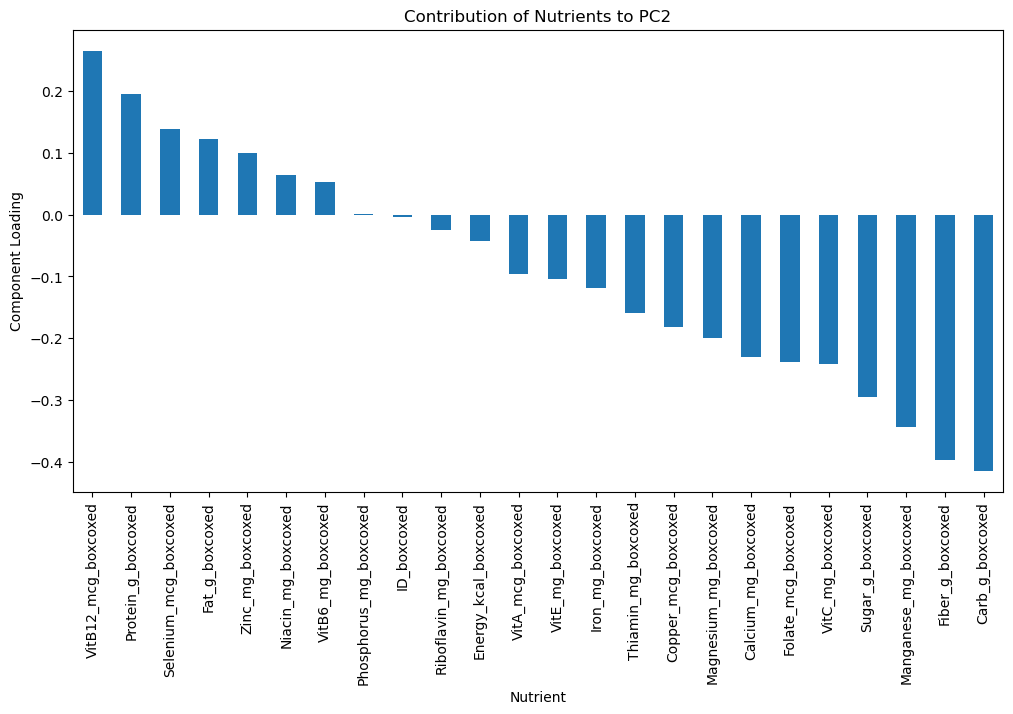

In [63]:
#TODO
plt.figure(figsize=(12, 6))
sorted_pc2.plot(kind='bar')
plt.title('Contribution of Nutrients to PC2')
plt.ylabel('Component Loading')
plt.xlabel('Nutrient')
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">The plot shows which nutrients have the highest influence on the first principal component, showing their strong influence. High positive or negative values suggest these nutrients significantly differentiate the samples along PCA1. Similarly, the plot for PCA2 shows the key nutrients influencing the second principal component. These nutrients are essential for differentiating samples along PCA2, often representing a different aspect of the data compared to PCA1.</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

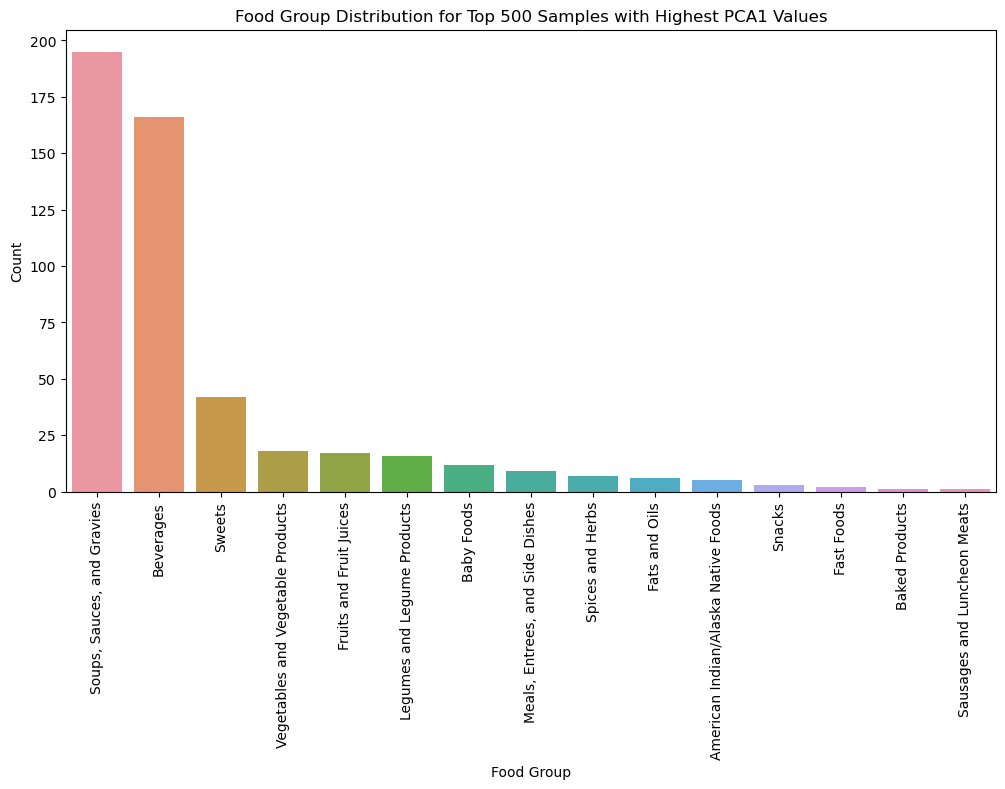

In [71]:
#TODO
top_500_pca1 = pca_df.nlargest(500, 'PC1')
plt.figure(figsize=(12, 6))
sns.countplot(data=top_500_pca1, x='FoodGroup', order=top_500_pca1['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution for Top 500 Samples with Highest PCA1 Values')
plt.ylabel('Count')
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.show()

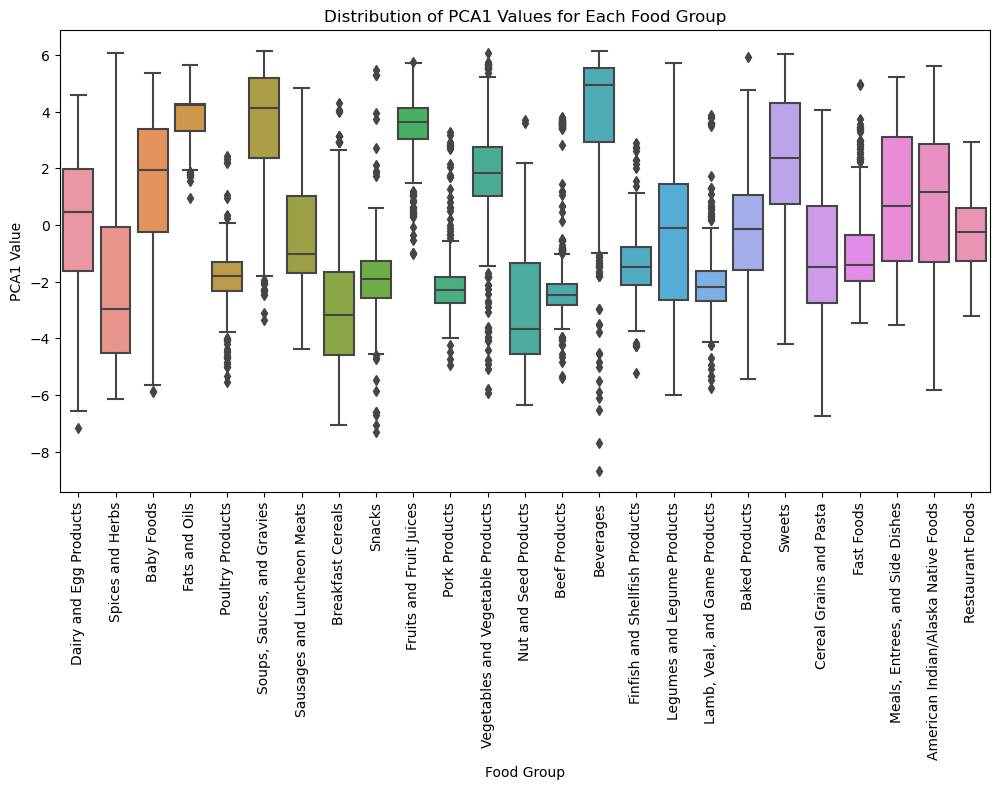

In [72]:
#TODO
plt.figure(figsize=(12, 6))
sns.boxplot(data=pca_df, x='FoodGroup', y='PC1')
plt.title('Distribution of PCA1 Values for Each Food Group')
plt.ylabel('PCA1 Value')
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.show()

Do the same for pca2.

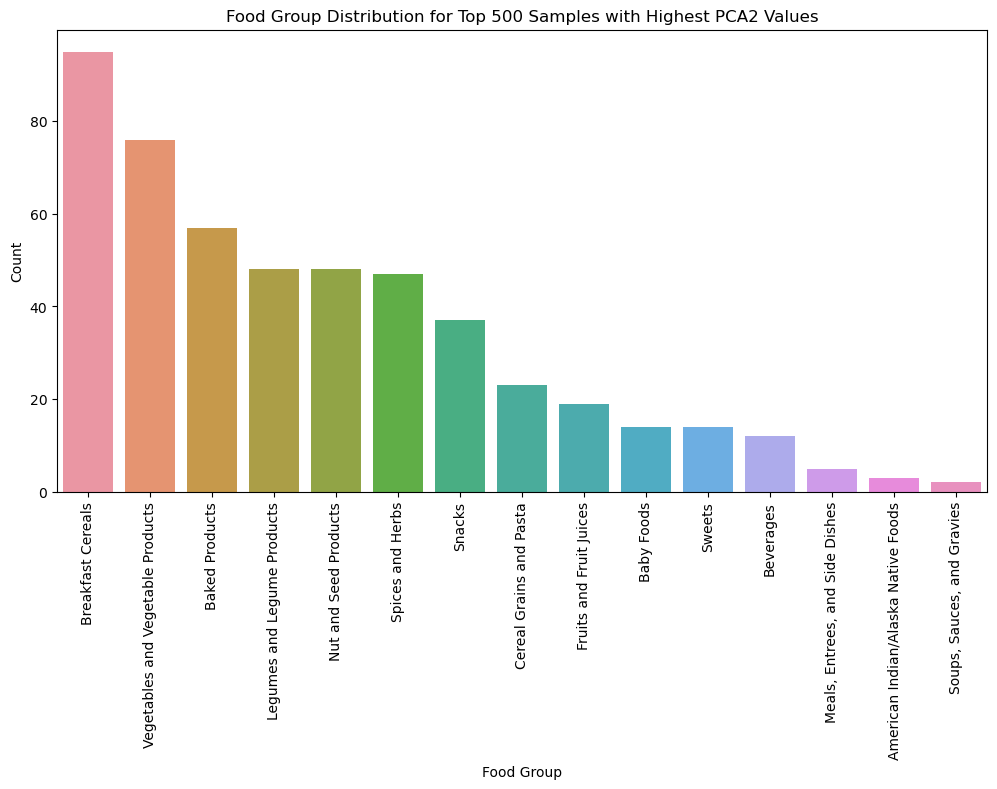

In [73]:
#TODO
top_500_pca2 = pca_df.nlargest(500, 'PC2')

plt.figure(figsize=(12, 6))
sns.countplot(data=top_500_pca2, x='FoodGroup', order=top_500_pca2['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution for Top 500 Samples with Highest PCA2 Values')
plt.ylabel('Count')
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.show()

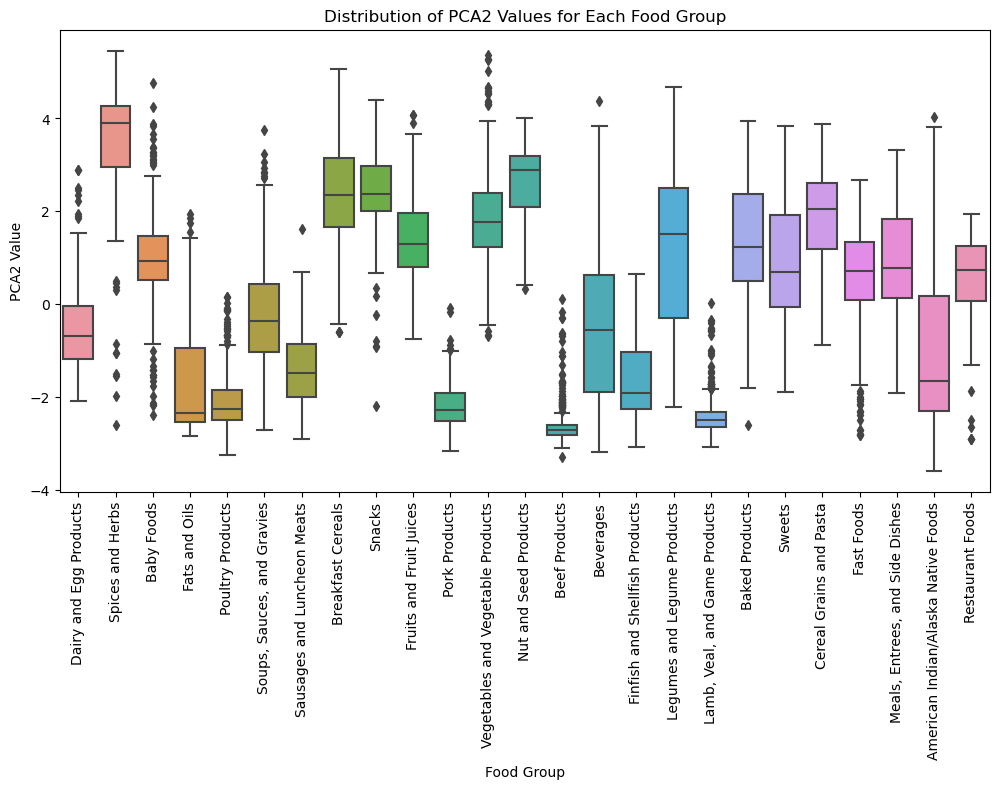

In [74]:
#TODO
plt.figure(figsize=(12, 6))
sns.boxplot(data=pca_df, x='FoodGroup', y='PC2')
plt.title('Distribution of PCA2 Values for Each Food Group')
plt.ylabel('PCA2 Value')
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


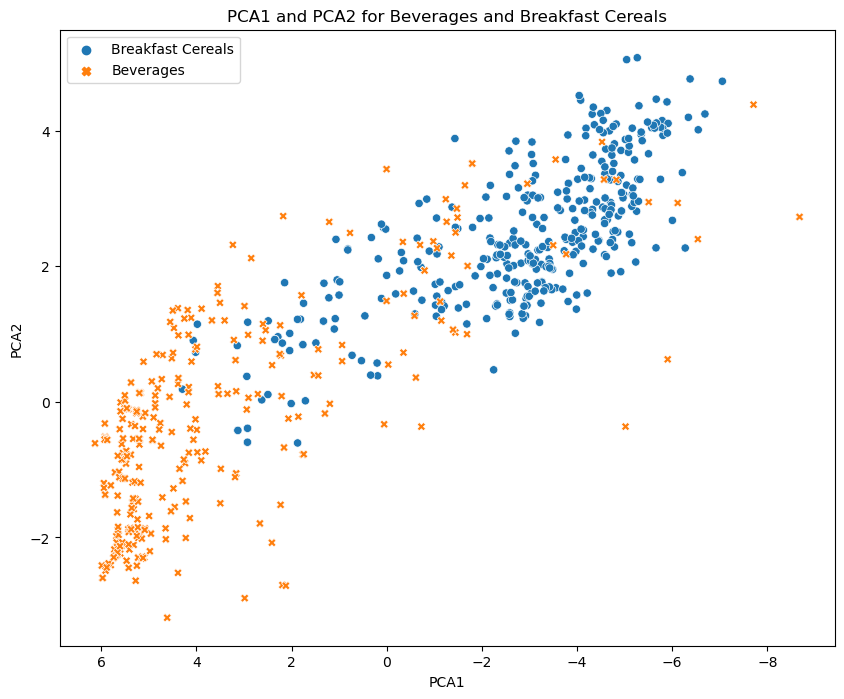

In [75]:
#TODO
beverages_cereals_df = pca_df[pca_df['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=beverages_cereals_df, x='PC1', y='PC2', hue='FoodGroup', style='FoodGroup')
plt.title('PCA1 and PCA2 for Beverages and Breakfast Cereals')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.gca().invert_xaxis()
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">The food group distribution plot shows which food groups are more dominant among the samples with the highest PCA1 values, showing specific groups associated with high PCA1.
Boxplots of PCA1 for each food group shows the central tendency and spread of PCA1 values within each group, indicating how each group contributes to or aligns with the first principal component.
Similar to PCA1, these boxplots show the distribution of PCA2 values, providing insights into how each food group aligns with the second principal component.
The scatterplot of PCA1 vs. PCA2 for these groups showing their relative positions and spread in the reduced dimensional space, indicating similarities or differences between them along these principal components.</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">By reducing the dimension of the scatter plot along a specific axis, we can find the distribution of that specific food group along PCA1 or PCA2 (based on the reduced axis). so by checking the distribution of each food group along PCA1 and PCA2 we can be sure about the validity of the above plot</span>

